# Overlaying sigs from Mulder et al. (Florent) paper - presented at DC2024, photo from Sreekumar

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
# read in data
data_DC = sc.read_h5ad('20250617_AllDC_bbknn.h5ad')
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [4]:
data_DC2 = sc.read_h5ad('20250629_DC2_bbknn_clustered2.h5ad') 

In [5]:
# Set colours for NR_annotations_simple plot:
data_DC.uns["NR_annotations_simple_colors"] = ['#e377c2', '#aa40fc', '#8c564b']  

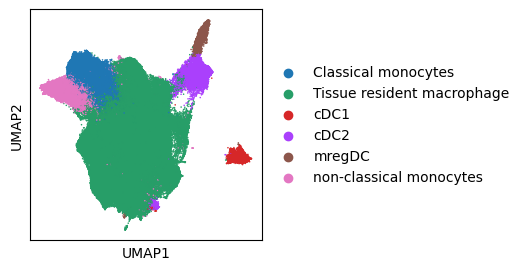

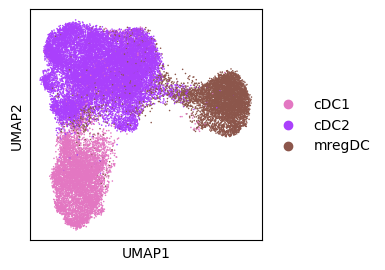

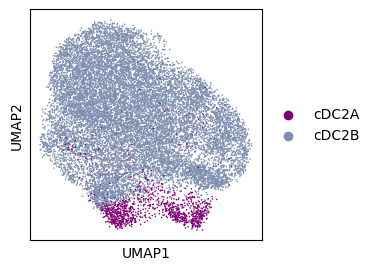

In [10]:
#export high res umap
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color="MyeloidAPC_Subsets", size=5, title="")
    sc.pl.umap(data_DC, color="NR_annotations_simple", size=5, title="")
    sc.pl.umap(data_DC2, color="cDC2_A-B", size=5, title="")

### Overlay sigs

In [11]:
CCR7_mDC = ['BIRC3','CCR7','FSCN1','CCL19','LAMP3']
LTB_DC = ['LTB','LST1','CD1A','IL18']
CD207_DC = ['CD1A','CD207','HLA-DQB2','TNF','CD59','CCR6']
DC1 = ['CLEC9A','XCR1','IRF8','WDFY4','CADM1']
preDC = ['SIGLEC6','CD5','LILRA4','CXCR3','TCF4']
IL1B_DC = ['AREG','IL1B','CCL17','CXCL8','NFKIA','NFKB1']
Prolif_DC = ['PCNA','TUBA1','HMGB1','TOP2A','MKI67']
DC2 = ['FCER1A','CD1C','CD1D','CD1E','CLEC4A']
ISG_DC = ['ISG15','IFI6','IFI44L','IFIT3']
DC3 = ['CD14','MAFB','FCGR2A','TREM2','CD163']

In [12]:
# Define dictionary of gene sets
gene_sets = {
    "CCR7_mDC": CCR7_mDC,
    "LTB_DC": LTB_DC,
    "CD207_DC": CD207_DC,
    "DC1": DC1,
    "preDC": preDC,
    "IL1B_DC": IL1B_DC,
    "Prolif_DC": Prolif_DC,
    "DC2": DC2,
    "ISG_DC": ISG_DC,
    "DC3": DC3
}

In [13]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [14]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC, genes, score_name=name)

In [15]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

In [18]:
colour_vars_1 = ["CCR7_mDC","LTB_DC","CD207_DC","DC1","preDC","IL1B_DC","Prolif_DC","DC2","ISG_DC","DC3","MyeloidAPC_Subsets"]
colour_vars_2 = ["CCR7_mDC","LTB_DC","CD207_DC","DC1","preDC","IL1B_DC","Prolif_DC","DC2","ISG_DC","DC3","NR_annotations_simple"]
colour_vars_3 = ["CCR7_mDC","LTB_DC","CD207_DC","DC1","preDC","IL1B_DC","Prolif_DC","DC2","ISG_DC","DC3","cDC2_A-B"]

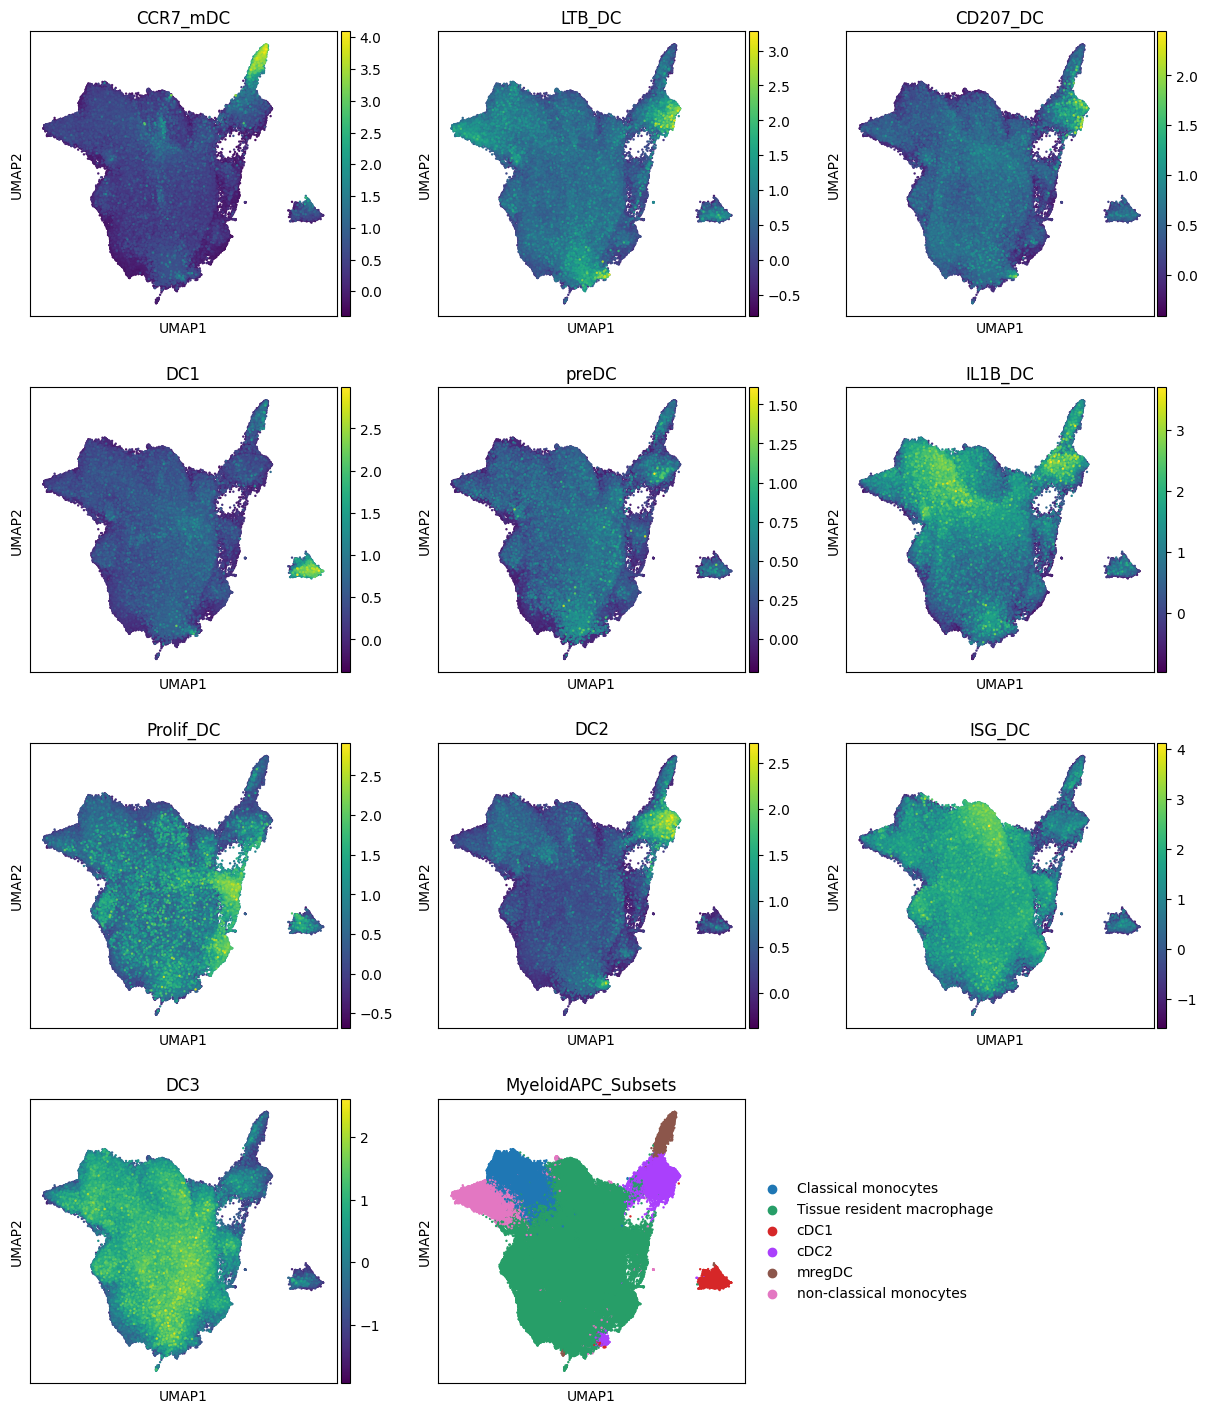

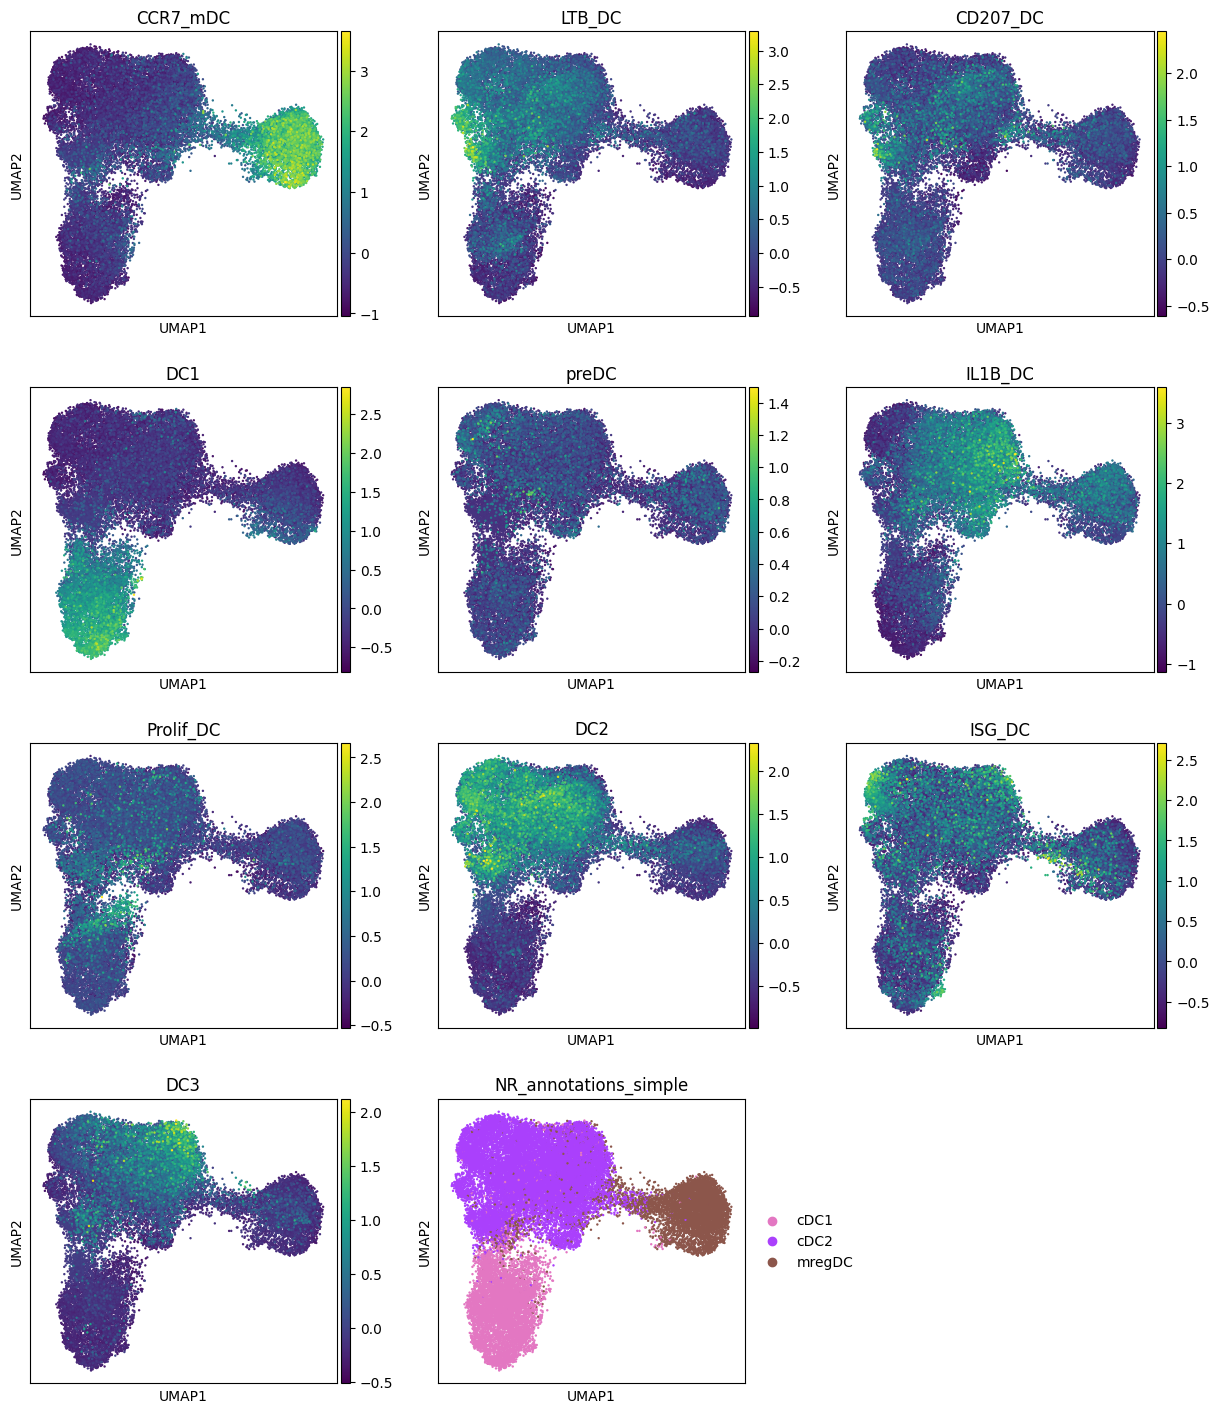

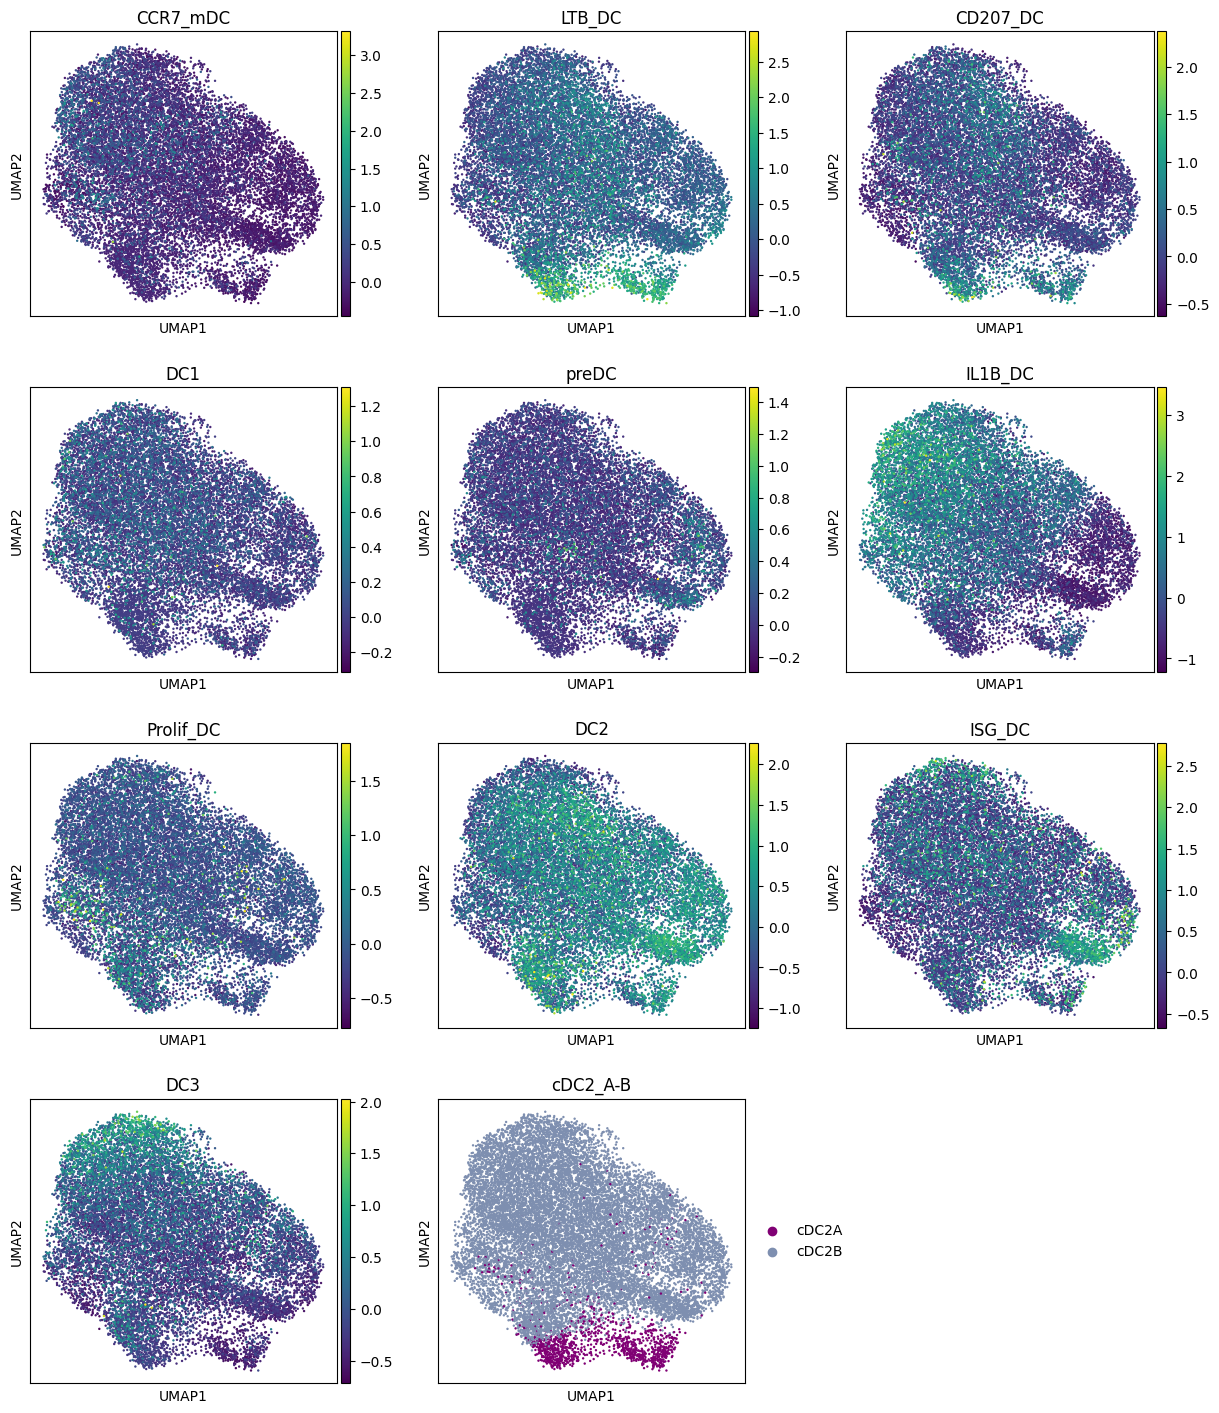

In [21]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=colour_vars_1, ncols=3, size=12)
    sc.pl.umap(data_DC, color=colour_vars_2, ncols=3, size=12)
    sc.pl.umap(data_DC2, color=colour_vars_3, ncols=3, size=12)

# LC Sigs:

In [20]:
colour_vars_LC = ["CSF1R","CD207","CD1A"]


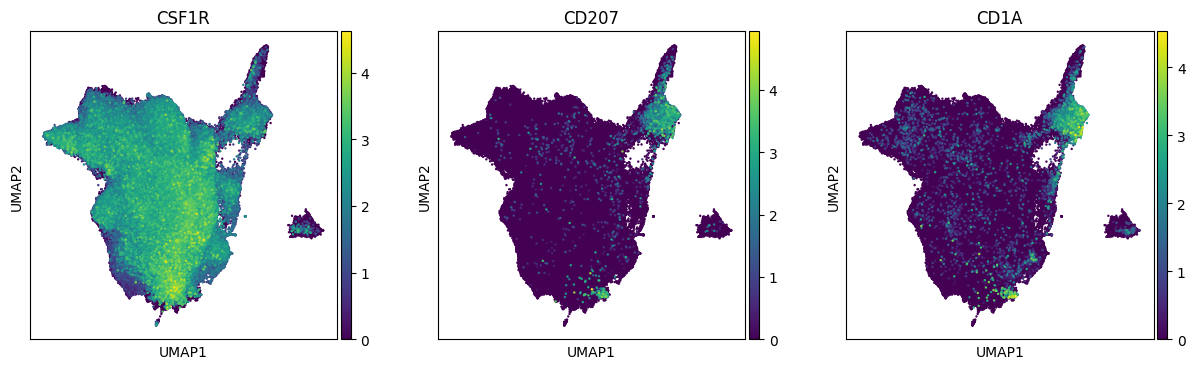

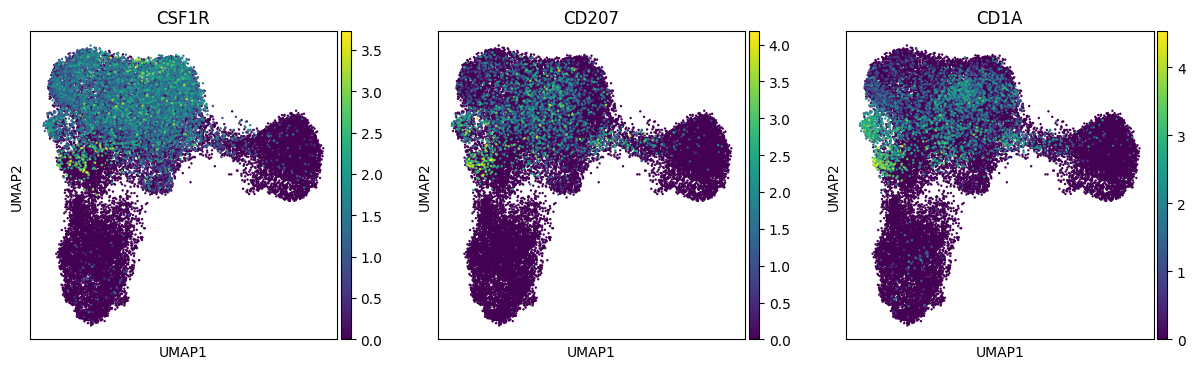

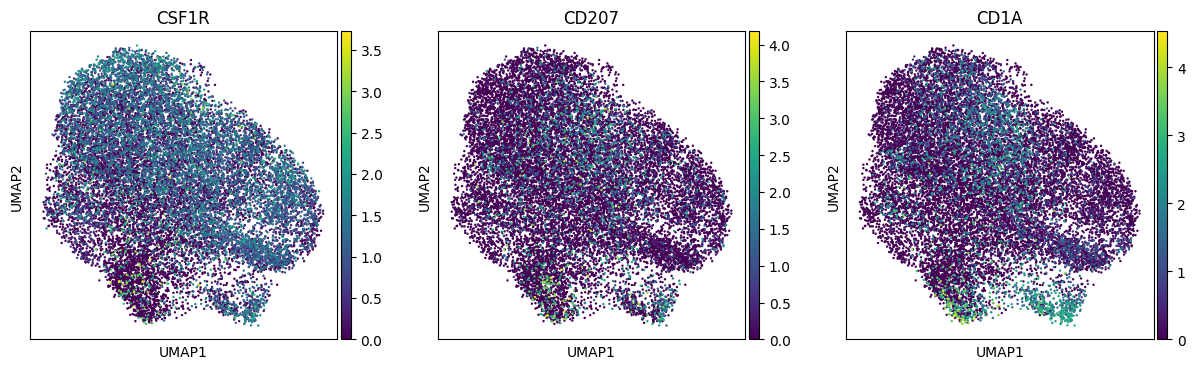

In [22]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=colour_vars_LC, ncols=3, size=12)
    sc.pl.umap(data_DC, color=colour_vars_LC, ncols=3, size=12)
    sc.pl.umap(data_DC2, color=colour_vars_LC, ncols=3, size=12)

test test